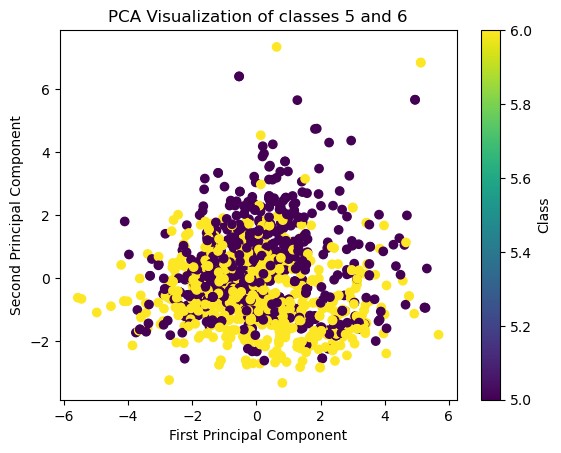

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as skm
import pandas as pd

df = pd.read_csv('winequality-red.csv', header = 0, delimiter=';')
headers = df.columns
data = df.values

df_5_6 = df.loc[df['quality'].isin([5, 6])]
y = df_5_6.quality
X = df_5_6.drop(['quality'],axis=1)

#y = df.quality
#X = df.drop(['quality'],axis=1)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X) 

#X_train, X_test, y_train, y_test = skm.train_test_split(X,y,test_size = 0.3, stratify=y, random_state=42)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the data in the reduced-dimensional space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(label="Class")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization of classes 5 and 6')
plt.show()

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
misclassified_indeces = []
for i, instance in enumerate(y):
    #if instance == 5.0 or instance == 6.0:
    if instance != y_pred[i]:
        misclassified_indeces.append(i)
print(len(misclassified_indeces))
X = np.delete(X, misclassified_indeces, axis=0)
y = y.to_numpy()
y = np.delete(y, misclassified_indeces, axis=0)


248


/Users/jkevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


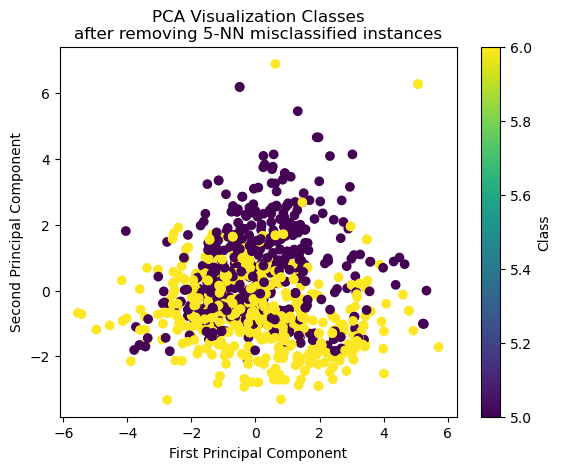

In [65]:
X_pca = pca.fit_transform(X)

# Visualize the data in the reduced-dimensional space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(label="Class")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization Classes\nafter removing 5-NN misclassified instances')
plt.show()